In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
#read in preprocessed_df.csv
df = pd.read_csv('csv_flight/preprocessed_df.csv')
#move target variable(DepDelay) to the end
df = df[[c for c in df if c not in ['DepDelay']] + ['DepDelay']]
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportSeqID,...,is_holiday,is_day_before_holiday,is_holiday_week,MinSince,OriginFlightDensity,Visibility,WindSpeed,SevereWeather,BadWeather,DepDelay
0,2014,1,1,1,3,2014-01-01,OO,N724SK,4974,1039705,...,1,0,1,360,2.0,10.0,5.0,0,0,-3.0
1,2014,1,1,1,3,2014-01-01,AA,N002AA,1315,1039705,...,1,0,1,420,3.0,10.0,5.0,0,0,-2.0
2,2014,1,1,1,3,2014-01-01,UA,N76288,1134,1039705,...,1,0,1,427,3.0,10.0,5.0,0,0,2.0
3,2014,1,1,1,3,2014-01-01,DL,N709DN,110,1039705,...,1,0,1,490,6.0,10.0,3.0,0,0,21.0
4,2014,1,1,1,3,2014-01-01,DL,N654DL,1347,1039705,...,1,0,1,495,6.0,10.0,3.0,0,0,-2.0


In [3]:
#reason for removal
#DaysSince, MinSince - Used to make other variables and dont provide any information
#FlightDate - Information is already in other columns(Year, Month, DayofMonth, DayOfWeek)
#is_holiday, is_day_before_holiday - is_holiday_week captures more information
df = df.drop(['DaysSince', 'is_holiday', 'is_day_before_holiday', 'MinSince', 'FlightDate'], axis=1)
print(df.shape)
print(df.dtypes)

(1639428, 29)
Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportSeqID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportSeqID                     int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
CRSArrTime                           int64
Cancelled                          float64
Diverted                           float64
CRSElapsedTime                     float64
Distance                           float64
is_holiday_week                      int

In [4]:
# turn all non-numerical data into numerical data, using .factorize()
object_cols = df.select_dtypes(include='object').columns
df_nums = df.copy()
for col in object_cols:
    df_nums[col], _ = pd.factorize(df[col])

#This shows the mapping of the categorical data to numerical data
print("Conversions of categorical data to numerical data:")
for col in object_cols:
    print(f"{col}:")
    print("Original:", df[col].unique())
    print("Converted:", df_nums[col].unique())

Conversions of categorical data to numerical data:
Reporting_Airline:
Original: ['OO' 'AA' 'UA' 'DL' 'WN']
Converted: [0 1 2 3 4]
Tail_Number:
Original: ['N724SK' 'N002AA' 'N76288' ... 'N291AY' 'N290AY' 'N107NN']
Converted: [   0    1    2 ... 4994 4995 4996]
Origin:
Original: ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO']
Converted: [0 1 2 3 4 5 6 7 8]
OriginCityName:
Original: ['Atlanta, GA' 'Charlotte, NC' 'Denver, CO' 'Dallas/Fort Worth, TX'
 'Houston, TX' 'Los Angeles, CA' 'Chicago, IL' 'Phoenix, AZ'
 'San Francisco, CA']
Converted: [0 1 2 3 4 5 6 7 8]
OriginState:
Original: ['GA' 'NC' 'CO' 'TX' 'CA' 'IL' 'AZ']
Converted: [0 1 2 3 4 5 6]
Dest:
Original: ['IAH' 'DFW' 'ORD' 'LAX' 'SFO' 'DEN' 'PHX' 'CLT' 'ATL']
Converted: [0 1 2 3 4 5 6 7 8]
DestCityName:
Original: ['Houston, TX' 'Dallas/Fort Worth, TX' 'Chicago, IL' 'Los Angeles, CA'
 'San Francisco, CA' 'Denver, CO' 'Phoenix, AZ' 'Charlotte, NC'
 'Atlanta, GA']
Converted: [0 1 2 3 4 5 6 7 8]
DestState:
Original: ['TX' 'IL'

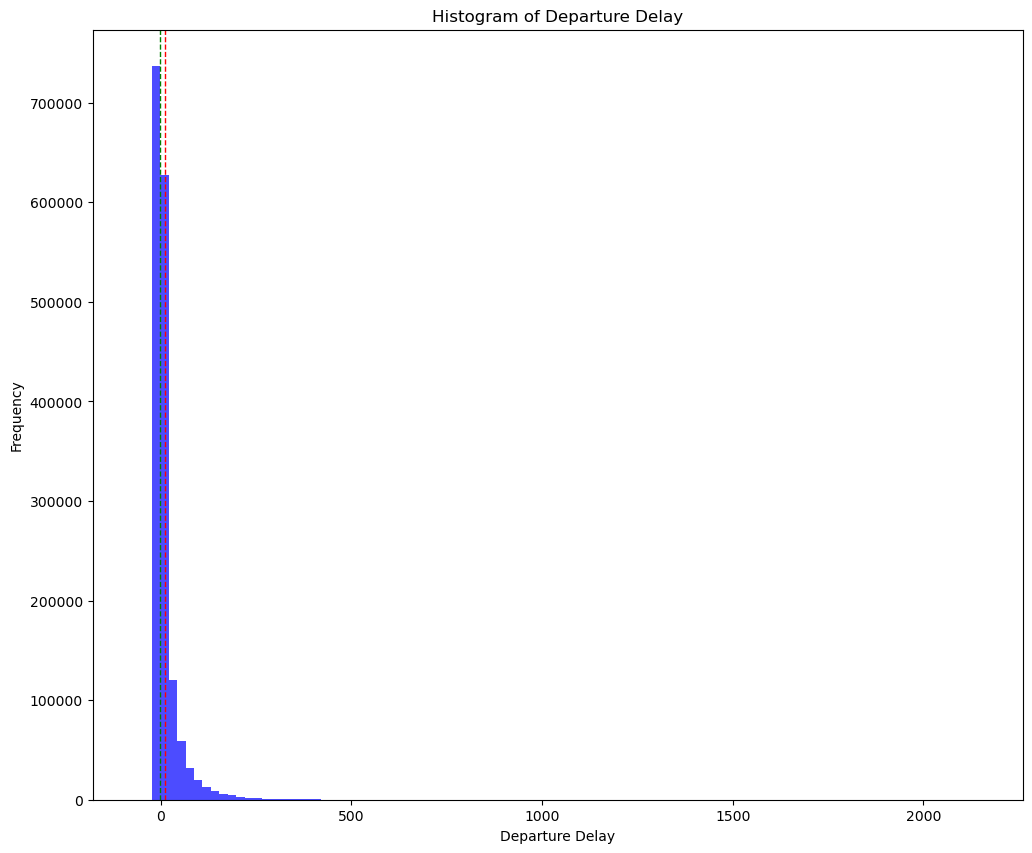

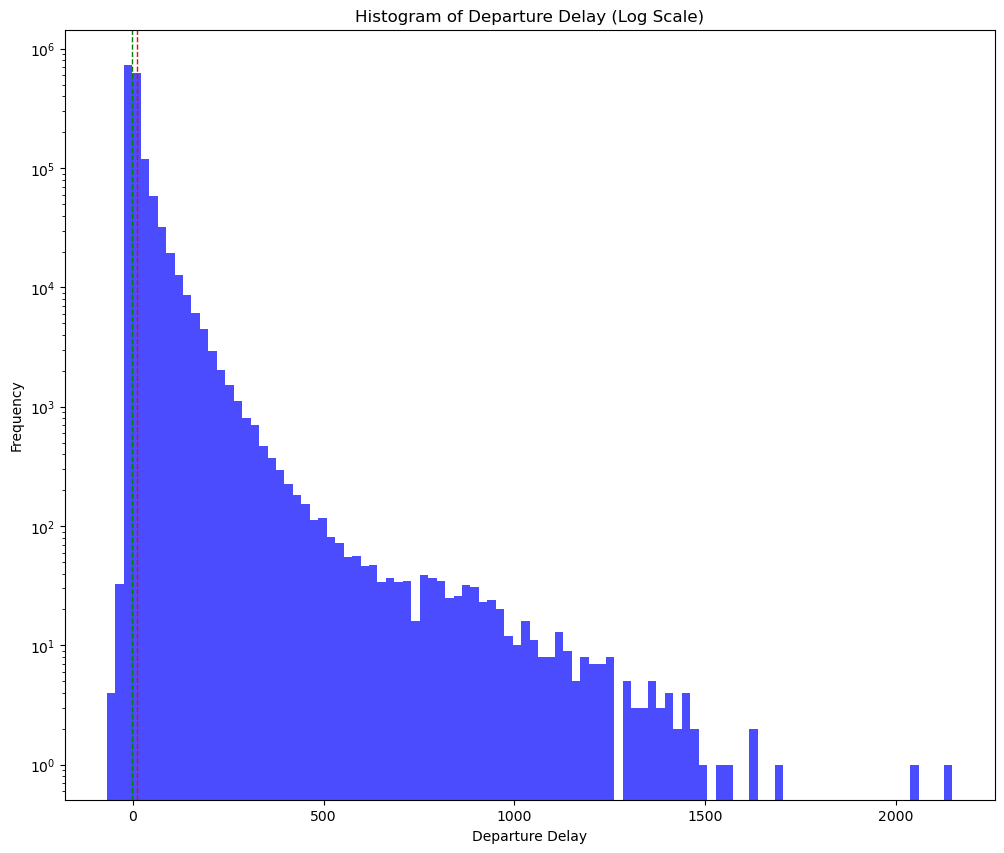

In [5]:
#histogram of departure delay frequency
plt.figure(figsize=(12, 10))
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay.png')

#and the logged version
plt.figure(figsize=(12, 10))
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay (Log Scale)')
plt.yscale('log')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay_log.png')

In [6]:
#summary statistics about the departure delay
print('Min:', df['DepDelay'].min())
print('Max:', df['DepDelay'].max())
print('Mean:', df['DepDelay'].mean())
print('Median:', df['DepDelay'].median())
print('Mode:', df['DepDelay'].mode())
print('Standard Deviation:', df['DepDelay'].std())
print('Skew:', df['DepDelay'].skew())

# Calculating the ratio of DepDelay < 15 to DepDelay > 15
negative_delays = df[df['DepDelay'] < 15].shape[0]
positive_delays = df[df['DepDelay'] > 15].shape[0]

ratio = negative_delays / positive_delays
print(f'Ratio of DepDelay < 15 to DepDelay > 15: {ratio:.2f}')

Min: -68.0
Max: 2149.0
Mean: 11.53406553993222
Median: -1.0
Mode: 0   -3.0
Name: DepDelay, dtype: float64
Standard Deviation: 40.341350425288944
Skew: 8.48420257120976
Ratio of DepDelay < 15 to DepDelay > 15: 4.00


In [7]:
# create a new target: delay_binary
# set to 0 if DepDelay is less than or equal to 15, and 1 DepDelay it is greater than 15
df_nums['delay_binary'] = np.where(df_nums['DepDelay'] <= 15, 0, 1)

In [8]:
# create a new target: delay_interval
# 0 for DepDelay<=0, 1 for 0-5, 2 for 5-15, etc. and 13 for DepDelay > 480
bins = [-np.inf, 0, 5, 15, 30, 60, 120, 300, 600, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]  
df_nums['delay_interval'] = pd.cut(df_nums['DepDelay'], bins=bins, labels=labels)

bin_counts = df_nums['delay_interval'].value_counts().sort_index()
print("Counts per delay interval:")
print(bin_counts)

Counts per delay interval:
delay_interval
0    953082
1    188705
2    171911
3    119619
4    100529
5     68756
6     32937
7      3195
8       694
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap with delay_binary')

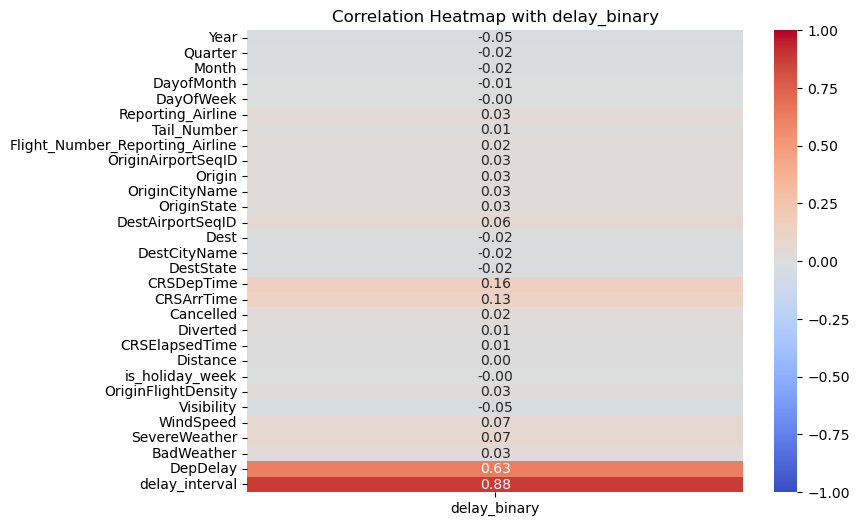

In [9]:
corr = df_nums.corr()
dep_delay_corr = corr[['delay_binary']].drop('delay_binary') 

plt.figure(figsize=(8, 6))
sns.heatmap(dep_delay_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with delay_binary')

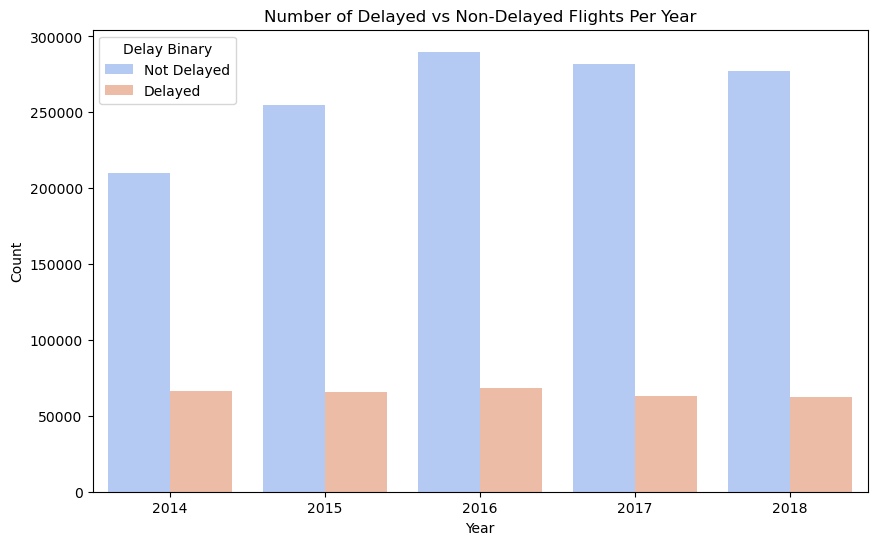

In [10]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='Year', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])

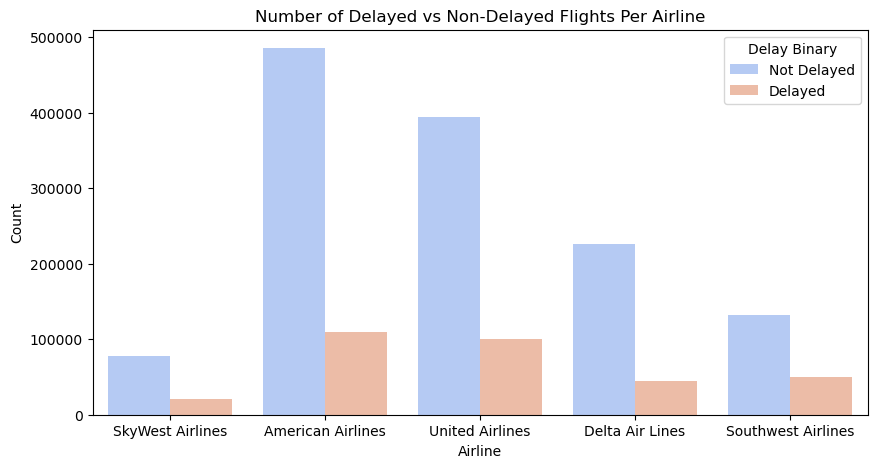

In [11]:
#make the same plot but show name of the airline
# Original: ['OO' 'AA' 'UA' 'DL' 'WN']
# Converted: ["SkyWest Airlines" "American Airlines" "United Airlines" "Delta Air Lines" "Southwest Airlines"]
airlines = df['Reporting_Airline'].unique()
airline_names = ['SkyWest Airlines', 'American Airlines', 'United Airlines', 'Delta Air Lines', 'Southwest Airlines']
airline_dict = dict(zip(airlines, airline_names))

df_nums['Reporting_Airline'] = df['Reporting_Airline'].map(airline_dict)

plt.figure(figsize=(10, 5))
sns.countplot(x='Reporting_Airline', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])
#plt.savefig('graphics/airline_delay.png')

df_nums.drop(['Reporting_Airline'], axis=1, inplace=True)

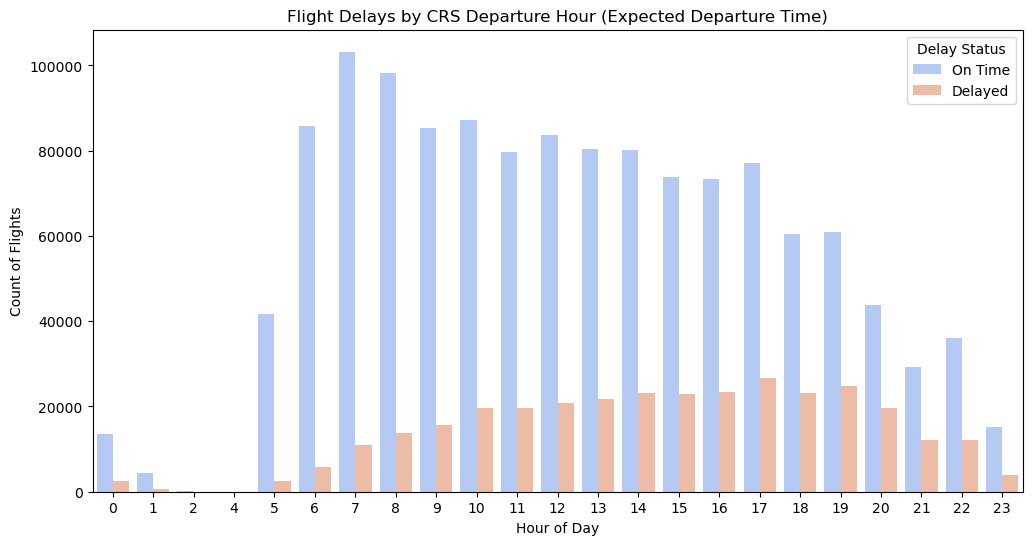

In [12]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSDepTime'] // 100

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by CRS Departure Hour (Expected Departure Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/hourly_delays_departure.png')

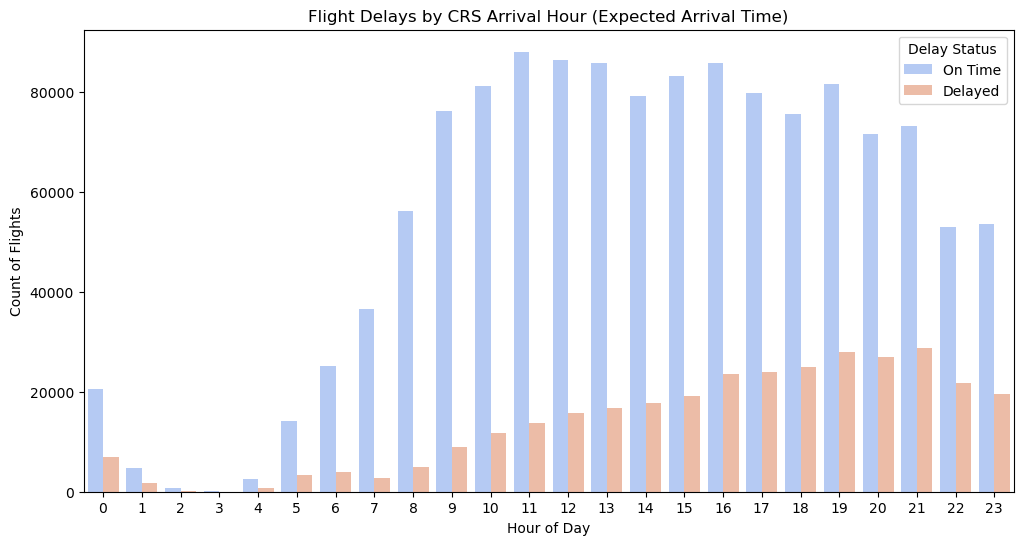

In [13]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSArrTime'] // 100

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by CRS Arrival Hour (Expected Arrival Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/hourly_delays_arrival.png')

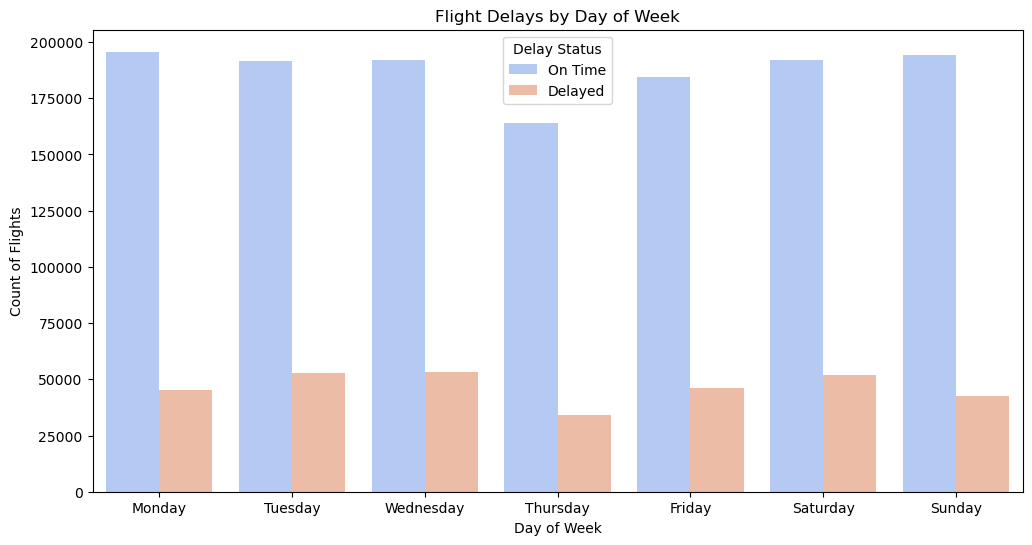

In [14]:
#make the same plot but for day of week
#make it the actual name of the day
# Original: [1 2 3 4 5 6 7]
# Converted: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
days = df['DayOfWeek'].unique()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dict = dict(zip(days, day_names))

df_nums_copy = df_nums.copy()
df_nums_copy['DayOfWeek'] = df_nums_copy['DayOfWeek'].map(day_dict)


plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/delay_by_day_of_week.png')

Text(0, 0.5, 'Origin Flight Density')

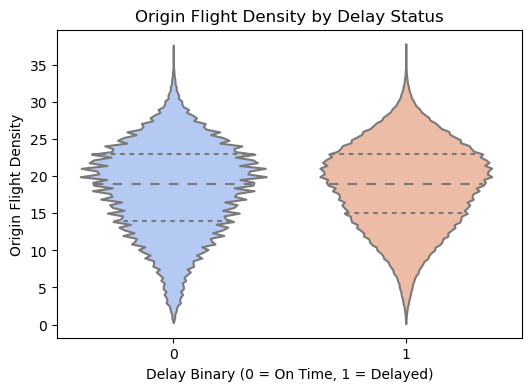

In [15]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='OriginFlightDensity', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('Origin Flight Density by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('Origin Flight Density')

Text(0, 0.5, 'WindSpeed')

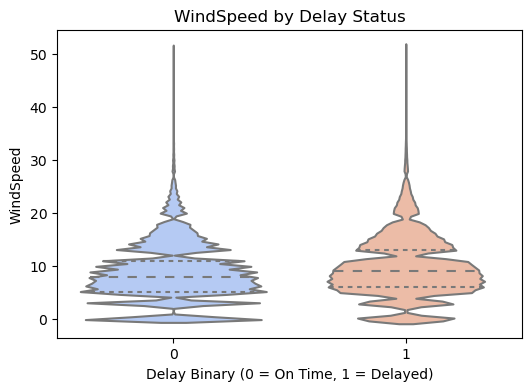

In [16]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='WindSpeed', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('WindSpeed by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('WindSpeed')

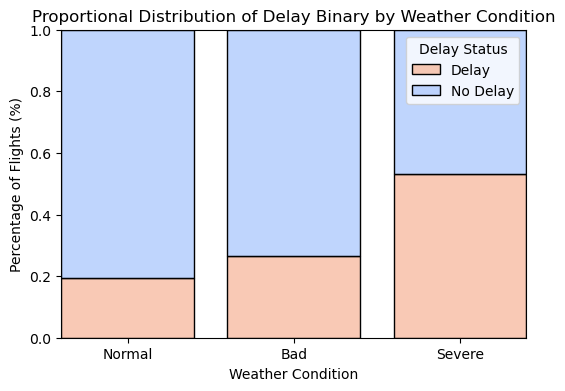

In [17]:
plot_df = df_nums.copy()

plot_df['WeatherCondition'] = 'Normal'
plot_df.loc[plot_df['BadWeather'] == 1, 'WeatherCondition'] = 'Bad'
plot_df.loc[plot_df['SevereWeather'] == 1, 'WeatherCondition'] = 'Severe'

plt.figure(figsize=(6, 4))
ax = sns.histplot(
    data=plot_df,
    x='WeatherCondition', 
    hue='delay_binary',   
    multiple="fill",
    discrete=True,
    shrink=0.8,
    common_norm=False,     
    palette='coolwarm'
)

plt.title('Proportional Distribution of Delay Binary by Weather Condition', fontsize=12)
plt.xlabel('Weather Condition', fontsize=10)
plt.ylabel('Percentage of Flights (%)', fontsize=10)

plt.legend(title='Delay Status', labels=['Delay', 'No Delay'], title_fontsize='10', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap with delay_interval')

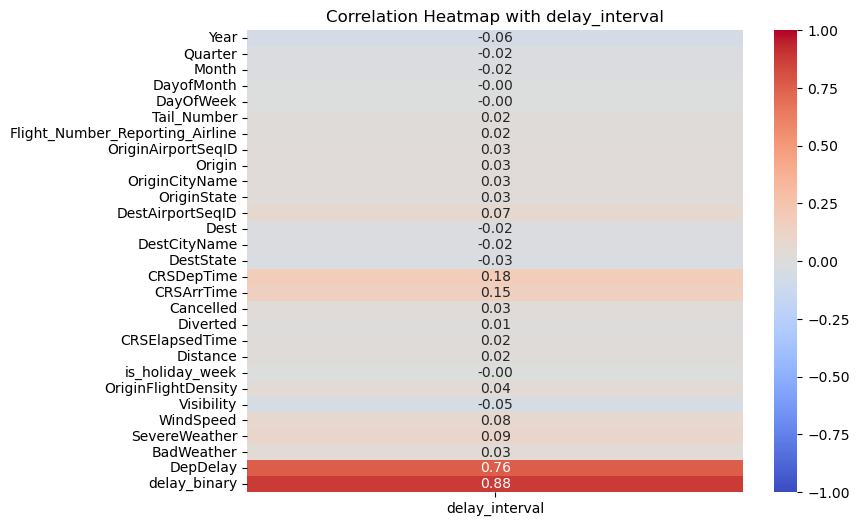

In [18]:
corr = df_nums.corr()
dep_delay_corr = corr[['delay_interval']].drop('delay_interval') 

plt.figure(figsize=(8, 6))
sns.heatmap(dep_delay_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with delay_interval')

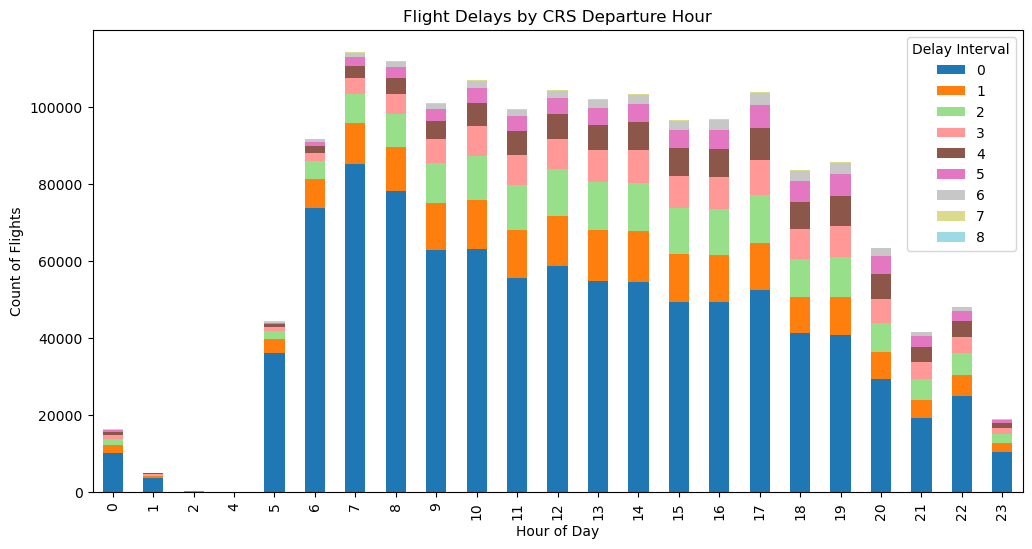

In [19]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSDepTime'] // 100

hourly_delay_distribution = pd.crosstab(df_nums_copy['Hour'], df_nums_copy['delay_interval'])

hourly_delay_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Flight Delays by CRS Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Interval')

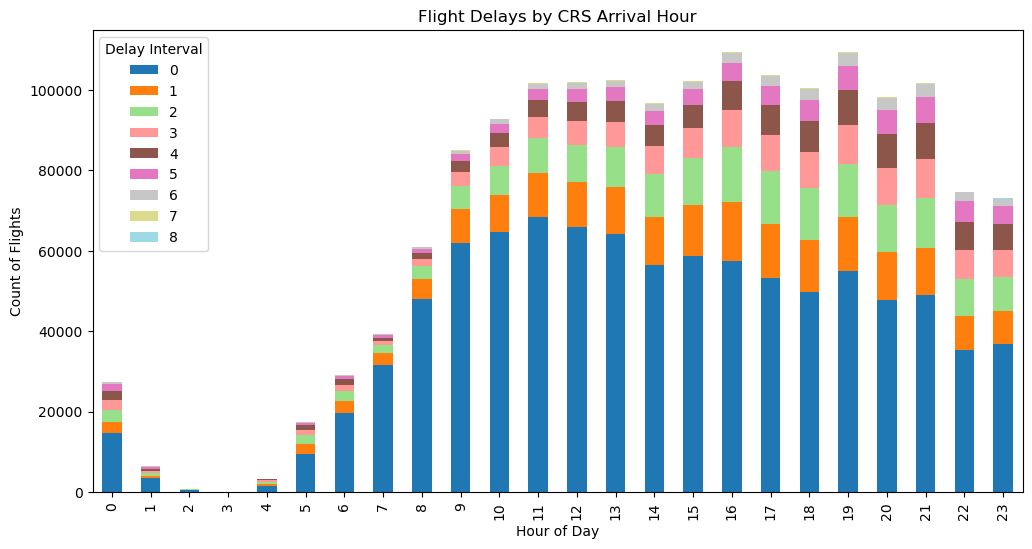

In [20]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSArrTime'] // 100

hourly_delay_distribution = pd.crosstab(df_nums_copy['Hour'], df_nums_copy['delay_interval'])

hourly_delay_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Flight Delays by CRS Arrival Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Interval')

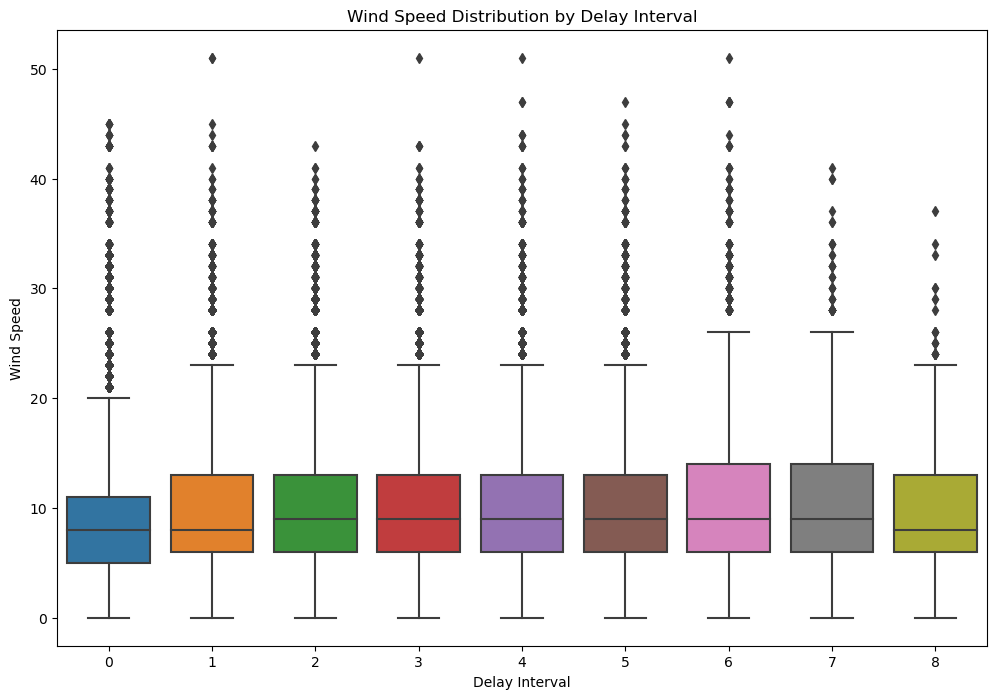

In [21]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='delay_interval', y='WindSpeed', data=df_nums)
plt.title('Wind Speed Distribution by Delay Interval')
plt.xlabel('Delay Interval')
plt.ylabel('Wind Speed')
plt.show()

Text(0, 0.5, 'Percentage of Flights (%)')

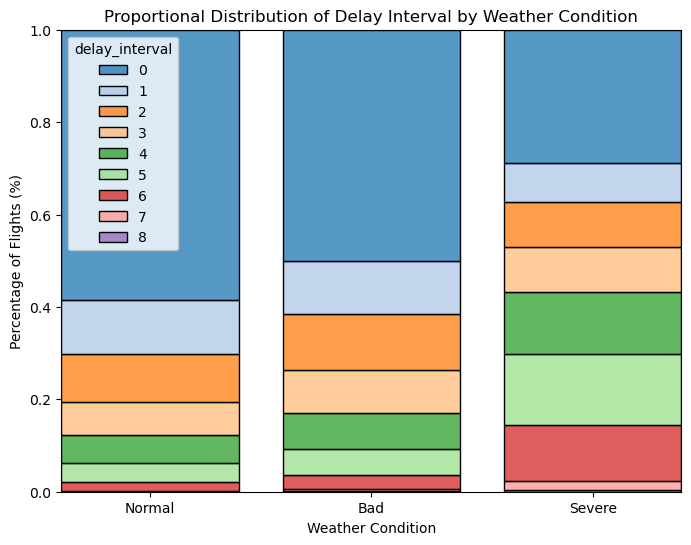

In [22]:
plot_df = df_nums.copy()

plot_df['WeatherCondition'] = 'Normal'
plot_df.loc[plot_df['BadWeather'] == 1, 'WeatherCondition'] = 'Bad'
plot_df.loc[plot_df['SevereWeather'] == 1, 'WeatherCondition'] = 'Severe'

plt.figure(figsize=(8, 6))
ax = sns.histplot(
    data=plot_df,
    x='WeatherCondition', 
    hue='delay_interval',   
    multiple="fill",
    discrete=True,
    shrink=0.8,
    common_norm=False,     
    palette='tab20'
)

plt.title('Proportional Distribution of Delay Interval by Weather Condition', fontsize=12)
plt.xlabel('Weather Condition', fontsize=10)
plt.ylabel('Percentage of Flights (%)', fontsize=10)

In [23]:
df_nums.to_csv('csv_flight/df_nums.csv', index=False)  

Explained Variance:  [1.30433011e-01 1.05528359e-01 8.92069906e-02 6.99038540e-02
 6.71607564e-02 5.70508460e-02 4.57848306e-02 4.01563917e-02
 3.66192495e-02 3.38954370e-02 3.36455135e-02 3.33427056e-02
 3.28957896e-02 3.26335285e-02 3.17984452e-02 3.04974510e-02
 2.89341600e-02 2.68285151e-02 2.23291582e-02 1.65922082e-02
 1.28746921e-02 1.11423541e-02 5.08544084e-03 3.06164843e-03
 9.73283847e-04 7.82780150e-04 5.06646647e-04 3.35953259e-04
 1.84550309e-33 6.61927168e-34]


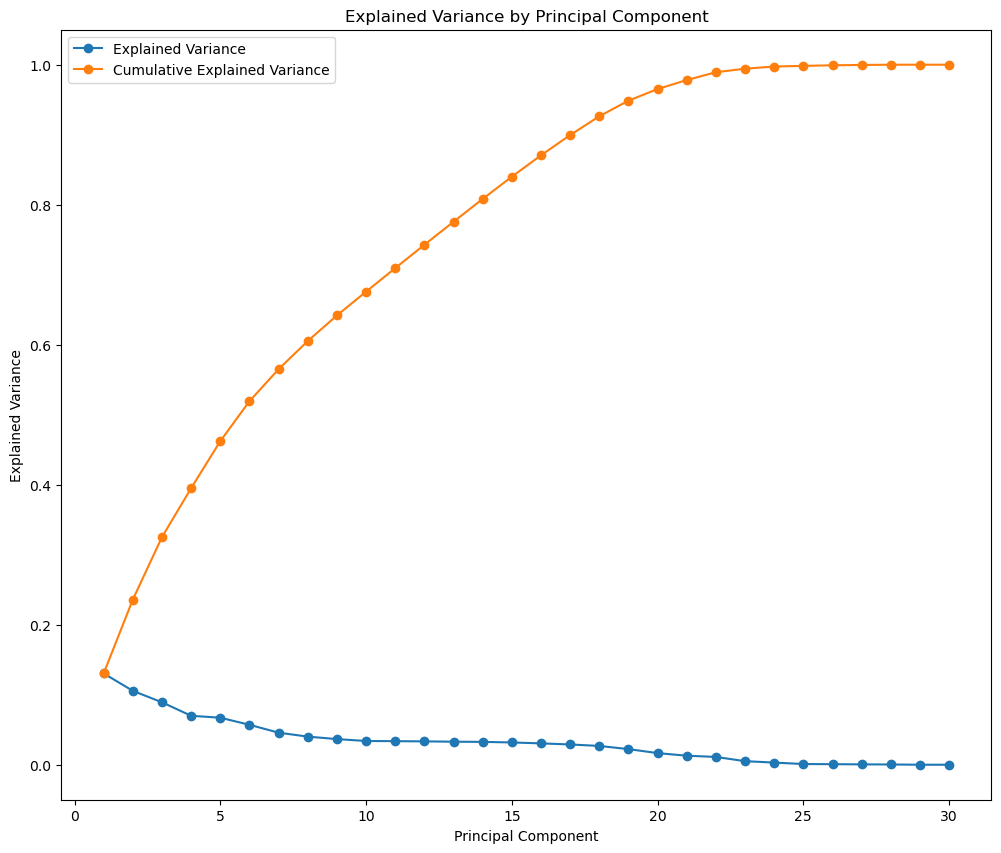

In [24]:
#Finding the principal components

#standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nums)

#find the principal components
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

#plot the explained variance and cumulative explained variance
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.legend()

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12'),
  Text(0.14, 0, '0.14'),
  Text(0.16, 0, '0.16'),
  Text(0.18, 0, '0.18')])

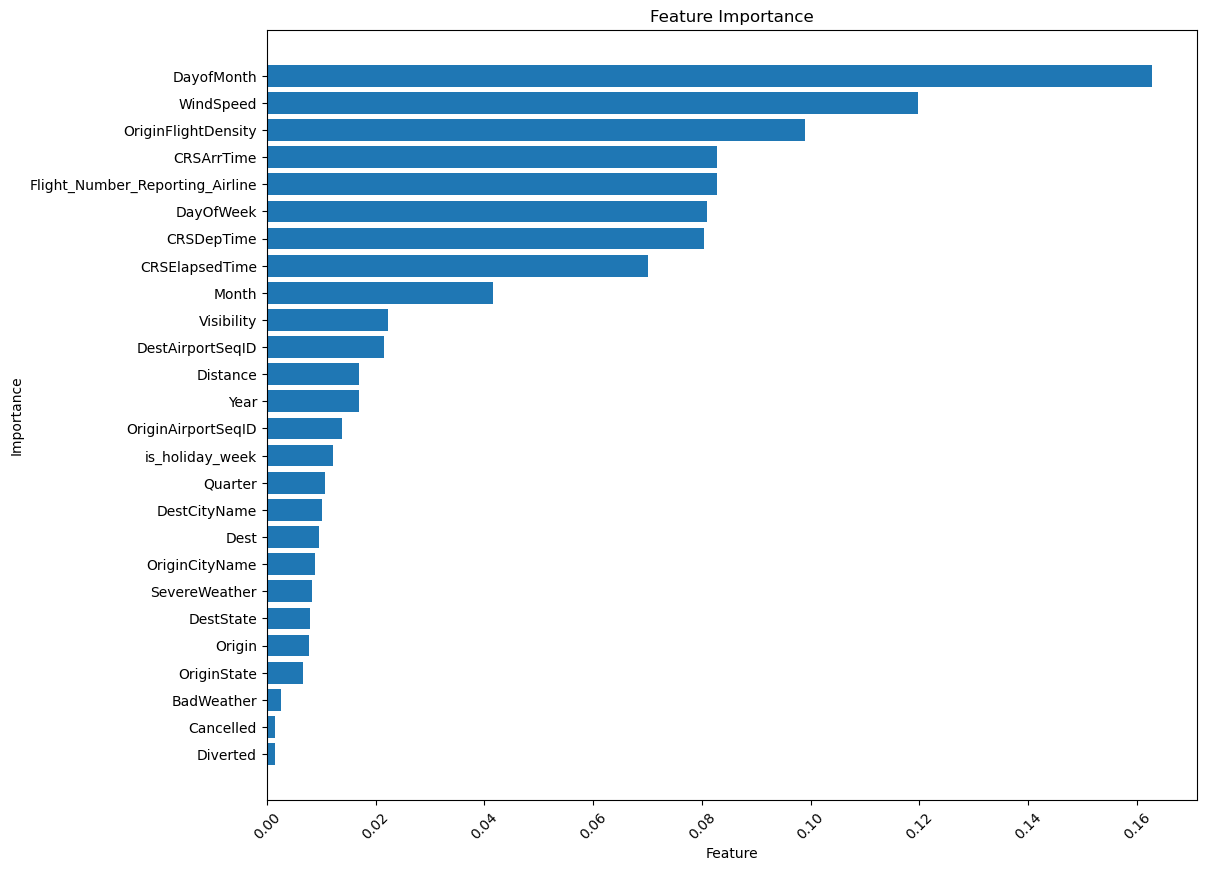

In [25]:
#create a dicision tree to find the most important features

#split the data into features and target
X = df_nums.drop(['DepDelay','delay_interval', 'delay_binary', 'Tail_Number'], axis=1)
y = df_nums['DepDelay']

#fit the decision tree
tree = DecisionTreeRegressor()
tree.fit(X, y)

#plot the feature importances
plt.figure(figsize=(12, 10))
sorted_idx = tree.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], tree.feature_importances_[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)

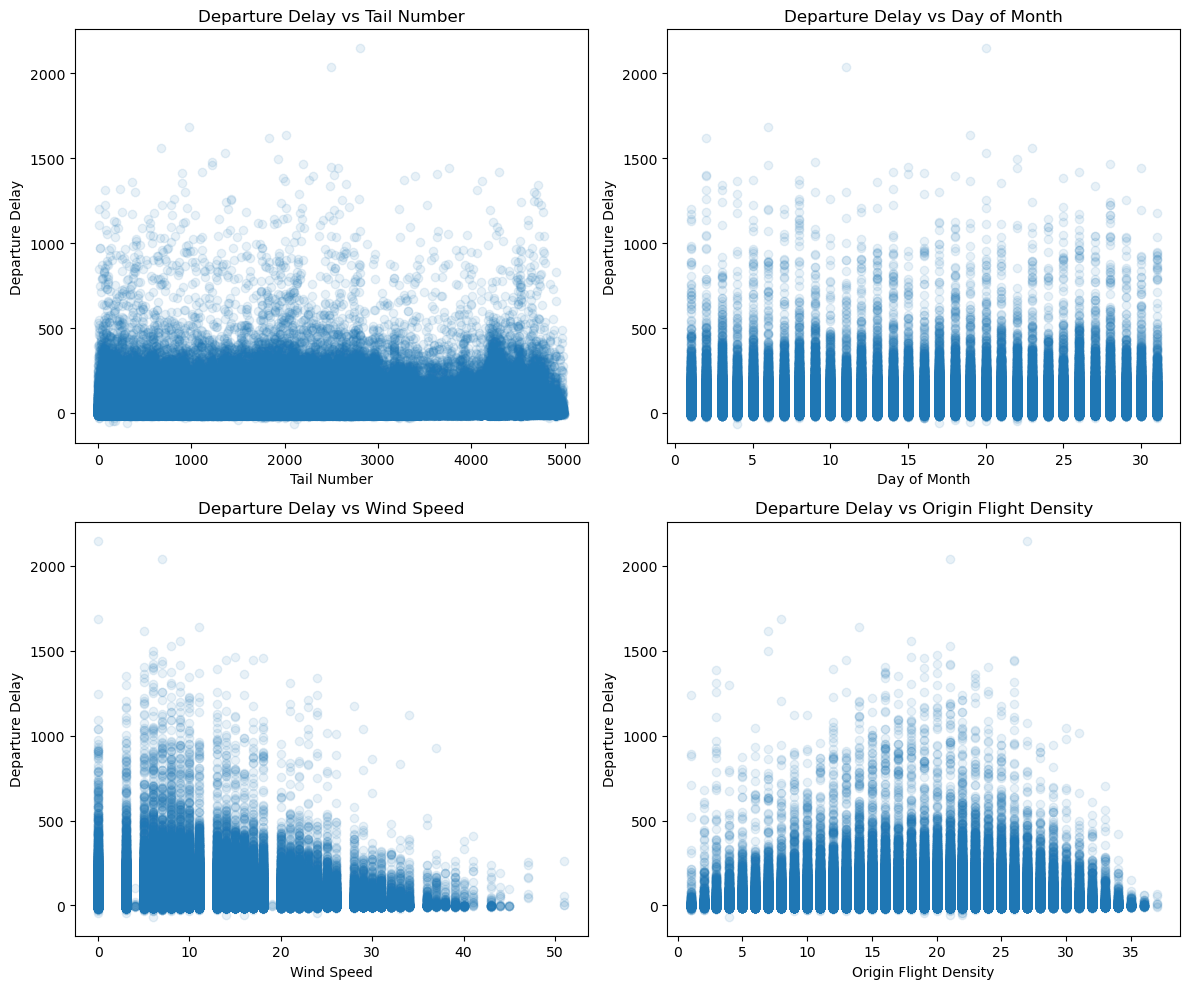

In [26]:
#create a 4x4 grid of scatter plots to show depdelay vs Tail_Number, DayofMonth, WindSpeed, and OriginFlightDensity
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(df_nums['Tail_Number'], df_nums['DepDelay'], alpha=0.1)
axs[0, 0].set_xlabel('Tail Number')
axs[0, 0].set_ylabel('Departure Delay')
axs[0, 0].set_title('Departure Delay vs Tail Number')

axs[0, 1].scatter(df_nums['DayofMonth'], df_nums['DepDelay'], alpha=0.1)
axs[0, 1].set_xlabel('Day of Month')
axs[0, 1].set_ylabel('Departure Delay')
axs[0, 1].set_title('Departure Delay vs Day of Month')

axs[1, 0].scatter(df_nums['WindSpeed'], df_nums['DepDelay'], alpha=0.1)
axs[1, 0].set_xlabel('Wind Speed')
axs[1, 0].set_ylabel('Departure Delay')
axs[1, 0].set_title('Departure Delay vs Wind Speed')

axs[1, 1].scatter(df_nums['OriginFlightDensity'], df_nums['DepDelay'], alpha=0.1)
axs[1, 1].set_xlabel('Origin Flight Density')
axs[1, 1].set_ylabel('Departure Delay')
axs[1, 1].set_title('Departure Delay vs Origin Flight Density')

plt.tight_layout()

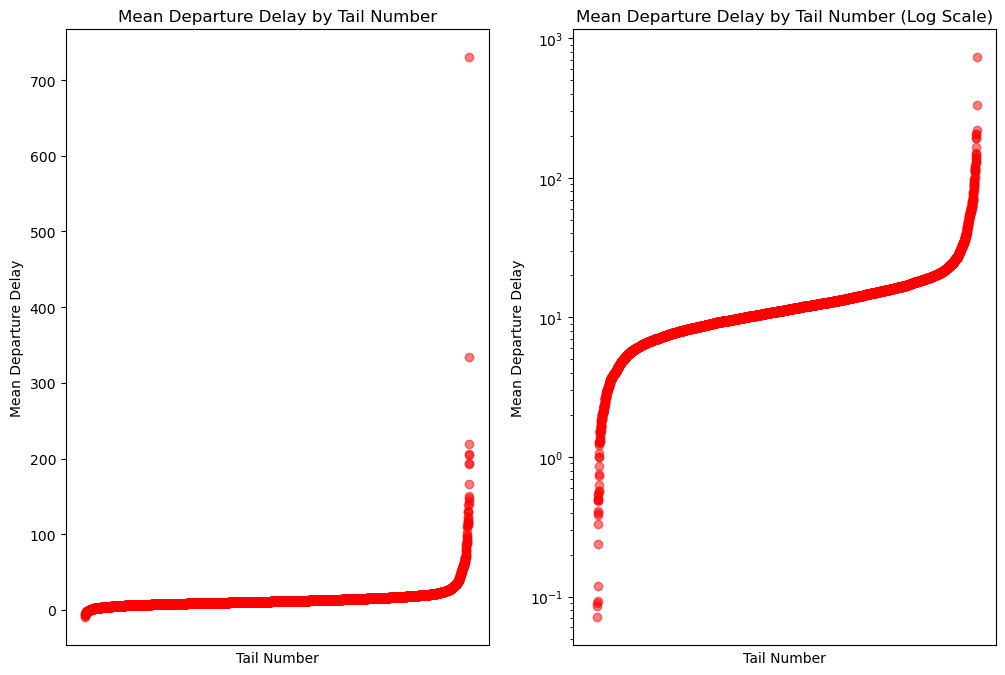

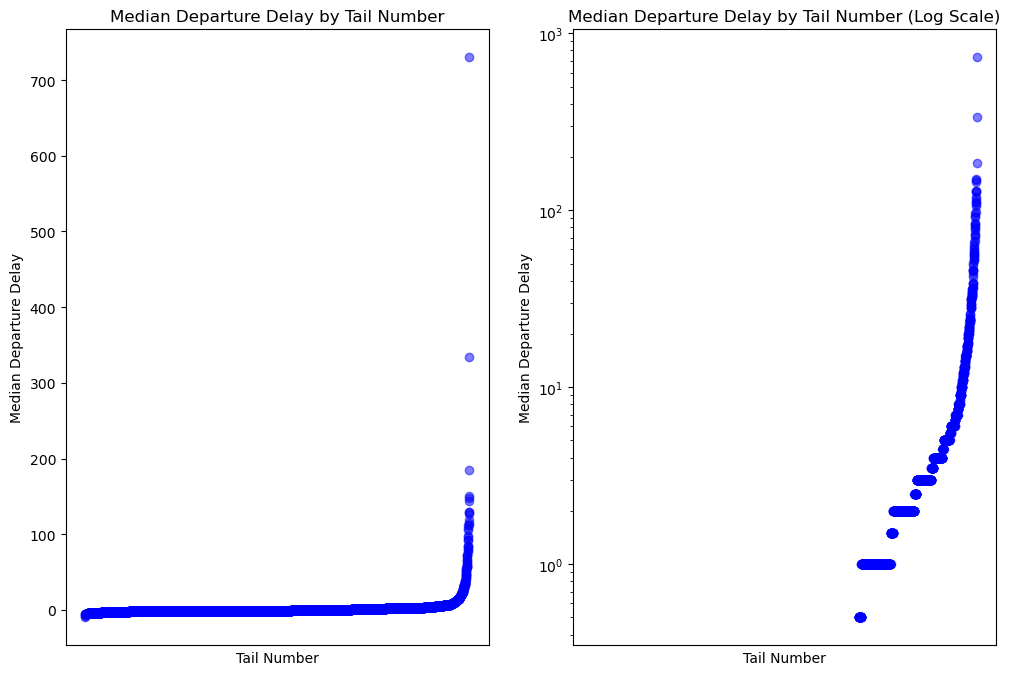

In [27]:
#Looking into why tail number is so important
#scatter plot of mean departure delay by tail number
mean_delay = df.groupby('Tail_Number')['DepDelay'].mean()
mean_delay = mean_delay.sort_values()

median_delay = df.groupby('Tail_Number')['DepDelay'].median()
median_delay = median_delay.sort_values()

#scatter plot of mean and median departure delay by tail number
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(mean_delay.index, mean_delay, color='red', alpha=0.5)
axs[0].set_xlabel('Tail Number')
axs[0].set_ylabel('Mean Departure Delay')
axs[0].set_title('Mean Departure Delay by Tail Number')
axs[0].set_xticks([])
axs[0].set_yscale('linear')

axs[1].scatter(mean_delay.index, mean_delay, color='red', alpha=0.5)
axs[1].set_xlabel('Tail Number')
axs[1].set_ylabel('Mean Departure Delay')
axs[1].set_title('Mean Departure Delay by Tail Number (Log Scale)')
axs[1].set_xticks([])
axs[1].set_yscale('log')

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(median_delay.index, median_delay, color='blue', alpha=0.5)
axs[0].set_xlabel('Tail Number')
axs[0].set_ylabel('Median Departure Delay')
axs[0].set_title('Median Departure Delay by Tail Number')
axs[0].set_xticks([])
axs[0].set_yscale('linear')

axs[1].scatter(median_delay.index, median_delay, color='blue', alpha=0.5)
axs[1].set_xlabel('Tail Number')
axs[1].set_ylabel('Median Departure Delay')
axs[1].set_title('Median Departure Delay by Tail Number (Log Scale)')
axs[1].set_xticks([])
axs[1].set_yscale('log')



#Since tail number is specific to each plane, this shows that some planes are just "unlucky" or "lucky" when it comes to delays

Accuracy: 0.5947524444471554


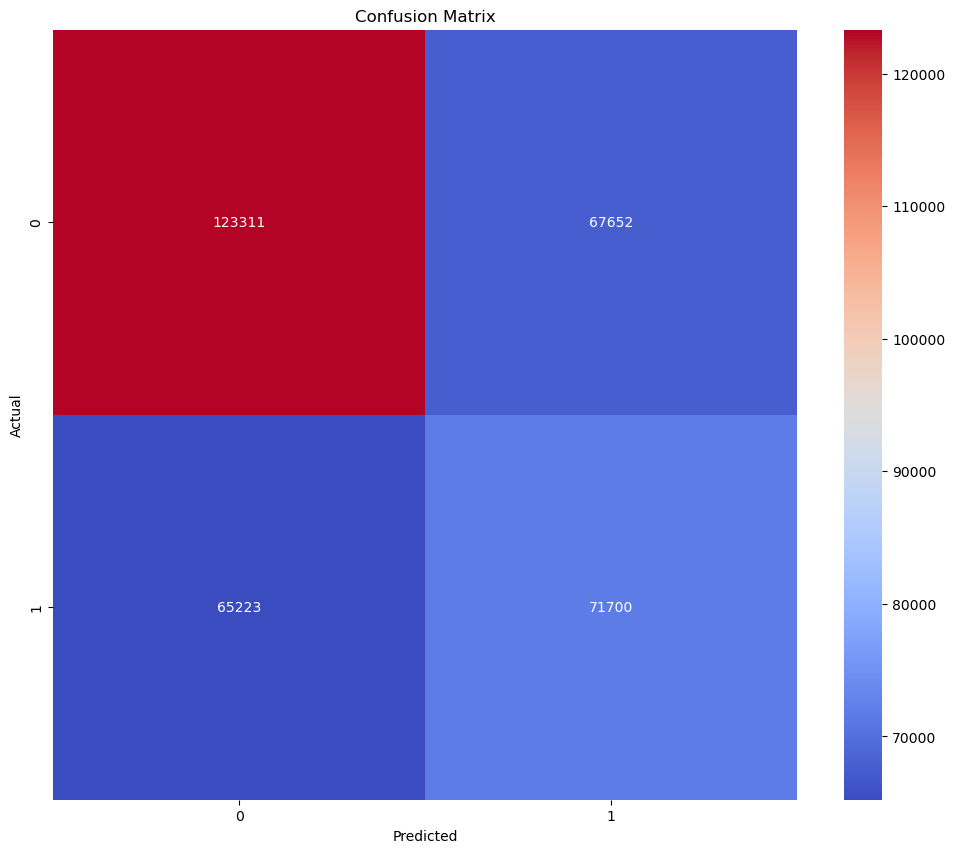

In [28]:
#make a confusion matrix for the decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#convert depdelay to binary (0 if on time or early, 1 if delayed)
y = df_nums['DepDelay'].apply(lambda x: 0 if x <= 0 else 1)
#remove tail number since it is specific to each plane
X = df_nums.drop(['DepDelay', 'Tail_Number', 'delay_binary', 'delay_interval'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
print('Accuracy:', accuracy)

In [29]:
#print out the most important features of the decision tree
importance = tree.feature_importances_
sorted_idx = importance.argsort()
print('Most Important Features:')
for i in range(1, 11):
    print(X.columns[sorted_idx[-i]], importance[sorted_idx[-i]])

Most Important Features:
DayofMonth 0.18736171592261092
WindSpeed 0.13570743571154265
CRSDepTime 0.09682320448393263
OriginFlightDensity 0.09650883896459331
DayOfWeek 0.09306863851789826
CRSArrTime 0.07267112996826587
Flight_Number_Reporting_Airline 0.06557668917236939
CRSElapsedTime 0.06483635429490882
Month 0.04792673406729119
Visibility 0.02086575987021962
